In [1]:
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
import matplotlib

(-0.5, 27.5, 27.5, -0.5)

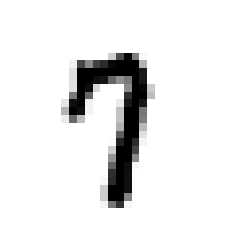

In [5]:
plt.imshow(train_images[21000],cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [6]:
from tensorflow.keras import Sequential,layers

In [18]:
model=Sequential()
model.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
model.add(layers.Dense(10,activation="softmax"))

In [20]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])

In [11]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype("float64")/255.0

In [12]:
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype("float64")/255.0

In [21]:
with tf.device("/gpu:0"):
    history=model.fit(train_images,train_labels,batch_size=128,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2653 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1083 - acc: 0.9682
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0701 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0519 - acc: 0.9841
Epoch 5/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0372 - acc: 0.9890


In [24]:
model_story=history.history

AttributeError: module 'matplotlib.pyplot' has no attribute 'legends'

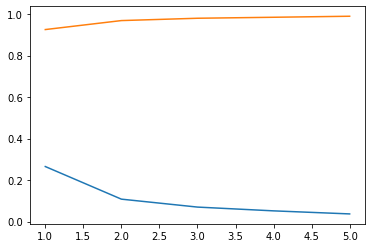

In [31]:
plt.plot(np.arange(1,6),model_story["loss"],label="training_error")
plt.plot(np.arange(1,6),model_story["acc"],label="accuracy")
plt.legends()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def learning_curce(clf,x,y):
    train_error=[]
    val_error=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    for m in range(1,len(x_train),5000):
        
        clf.fit(x_train[:m],y_train[:m])
        clf_pred=clf.predict(x_train[:m])
        val_predict=clf.predict(x_test)
        train_error.append(np.sqrt(mean_squared_error(clf_pred,y_train[:m])))
        val_error.append(np.sqrt(mean_squared_error(val_predict,y_test)))
    plt.plot(train_error,"--",label="training_error")
    plt.plot(val_error,"b-",label="validation_error")
    plt.legend()

Train on 1 samples
1/1 [==============================] - 0s 16ms/sample - loss: 5.0068e-06 - acc: 1.0000
Train on 5001 samples
5001/5001 [==============================] - 1s 158us/sample - loss: 0.1008 - acc: 0.9686
Train on 10001 samples
10001/10001 [==============================] - 1s 149us/sample - loss: 0.0513 - acc: 0.9821
Train on 15001 samples
15001/15001 [==============================] - 2s 149us/sample - loss: 0.0375 - acc: 0.9886
Train on 20001 samples
20001/20001 [==============================] - 3s 153us/sample - loss: 0.0346 - acc: 0.9894
Train on 25001 samples
25001/25001 [==============================] - 4s 144us/sample - loss: 0.0281 - acc: 0.9915
Train on 30001 samples
30001/30001 [==============================] - 5s 161us/sample - loss: 0.0277 - acc: 0.9914
Train on 35001 samples
35001/35001 [==============================] - 5s 146us/sample - loss: 0.0247 - acc: 0.9921
Train on 40001 samples
40001/40001 [==============================] - 7s 164us/sample - loss

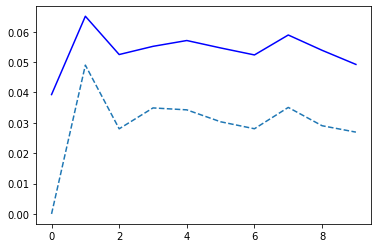

In [44]:
learning_curce(model,train_images,train_labels)